In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)

cols_to_drop = ['Lat', 'Long']
df.drop(columns=cols_to_drop, inplace=True)
df.rename(columns={"Province/State":"state", "Country/Region":"country"}, inplace=True)
df.reset_index(inplace=True, drop=True)

### Functions

In [2]:
def format_date(df):
    df['date'] = df['date'].strp
    
def add_stats(df):
    df['date'] = pd.to_datetime(df['date'])
    df['case_count'] = df['cumsum'] - df['cumsum'].shift(1)
    df['day_on_day'] = df['case_count'] - df['case_count'].shift(1)
    df = df.fillna(0)
    df['day_on_day'] = df['day_on_day'].astype('int32')
    df['day_on_day_percent'] = ((df['day_on_day'] / df['case_count'].shift(1))*100).round(2)

    return df

# Global

In [3]:
cols_to_drop = ['state', 'country']
df_world = df.drop(columns=cols_to_drop)
df_world = pd.DataFrame(df_world.sum()).reset_index()
df_world.columns = ['date', 'cumsum']
df_world = add_stats(df_world)

In [4]:
df_world.tail()

,date,cumsum,case_count,day_on_day,day_on_day_percent
91,2020-04-22,2624107,75286.0,-1776,-2.30
92,2020-04-23,2707742,83635.0,8349,11.09
93,2020-04-24,2811603,103861.0,20226,24.18
94,2020-04-25,2897624,86021.0,-17840,-17.18
95,2020-04-26,2972363,74739.0,-11282,-13.12


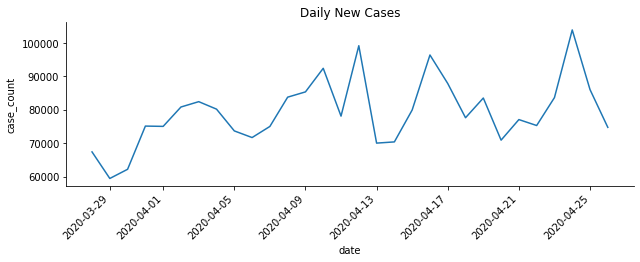

In [5]:
recent_df = df_world
# recent_df = df_world.tail(30)
chart = sns.relplot(x="date", y="case_count", kind="line", data=recent_df.tail(30), height=3, aspect=3)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
chart.set(title='Daily New Cases')

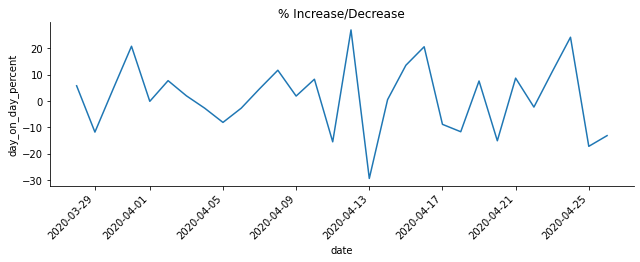

In [6]:
chart = sns.relplot(x="date", y="day_on_day_percent", kind="line", data=recent_df.tail(30), height=3, aspect=3)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
chart.set(title='% Increase/Decrease')

# Countries breakdown

In [7]:
countries = ['US', 'Singapore', 'Malaysia']

,country,date,cumsum,case_count,day_on_day,day_on_day_percent
91,US,2020-04-22,840351,28486.0,947,3.44
92,US,2020-04-23,869170,28819.0,333,1.17
93,US,2020-04-24,905358,36188.0,7369,25.57
94,US,2020-04-25,938154,32796.0,-3392,-9.37
95,US,2020-04-26,965785,27631.0,-5165,-15.75


,country,date,cumsum,case_count,day_on_day,day_on_day_percent
91,Singapore,2020-04-22,10141,1016.0,-95,-8.55
92,Singapore,2020-04-23,11178,1037.0,21,2.07
93,Singapore,2020-04-24,12075,897.0,-140,-13.50
94,Singapore,2020-04-25,12693,618.0,-279,-31.10
95,Singapore,2020-04-26,13624,931.0,313,50.65


,country,date,cumsum,case_count,day_on_day,day_on_day_percent
91,Malaysia,2020-04-22,5532,50.0,-7,-12.28
92,Malaysia,2020-04-23,5603,71.0,21,42.00
93,Malaysia,2020-04-24,5691,88.0,17,23.94
94,Malaysia,2020-04-25,5742,51.0,-37,-42.05
95,Malaysia,2020-04-26,5780,38.0,-13,-25.49


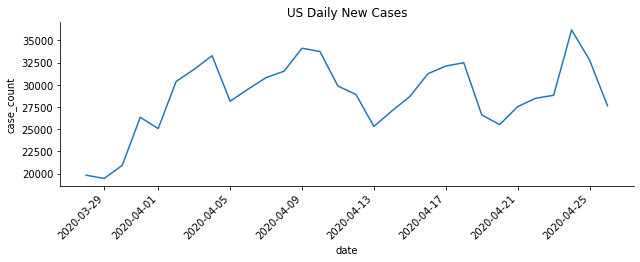

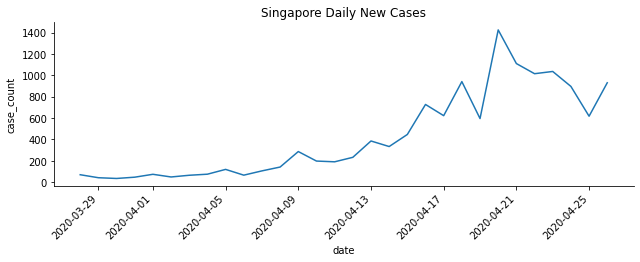

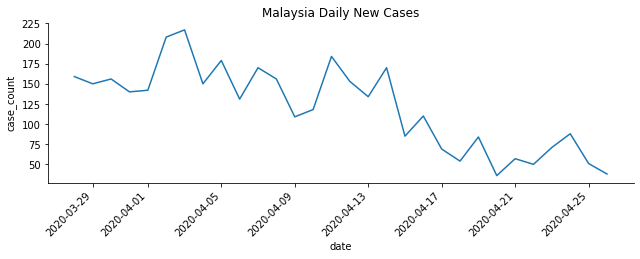

In [8]:
from IPython.display import display

for country in countries: 
    df_subset = df[df['country']==country]
    df_subset.drop(columns='state', inplace=True)
    df_subset = df_subset.melt(id_vars=['country'], 
                               var_name="date", 
                               value_name="cumsum")
    df_subset = add_stats(df_subset)
    display(df_subset.tail())
    recent_df_subset = df_subset
    
    # recent_df = df_world.tail(30)
    chart = sns.relplot(x="date", y="case_count", kind="line", data=recent_df_subset.tail(30), height=3, aspect=3)
    chart.set_xticklabels(rotation=45, horizontalalignment='right')
    chart.set(title=country + ' Daily New Cases')

# United States

In [9]:
country_subset = ['US']
df_subset = df[df['country'].isin(country_subset)]
df_subset.drop(columns='state', inplace=True)
df_subset = df_subset.melt(id_vars=['country'], 
                           var_name="date", 
                           value_name="cumsum")
df_subset = add_stats(df_subset)

In [10]:
df_subset.tail()

,country,date,cumsum,case_count,day_on_day,day_on_day_percent
91,US,2020-04-22,840351,28486.0,947,3.44
92,US,2020-04-23,869170,28819.0,333,1.17
93,US,2020-04-24,905358,36188.0,7369,25.57
94,US,2020-04-25,938154,32796.0,-3392,-9.37
95,US,2020-04-26,965785,27631.0,-5165,-15.75


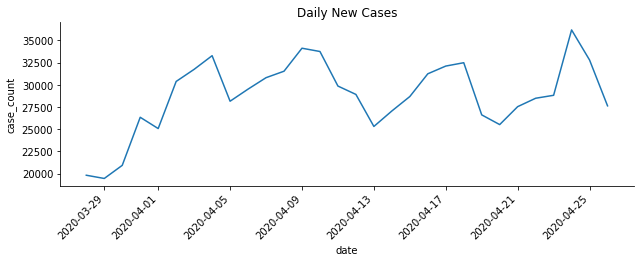

In [11]:
recent_df_subset = df_subset
# recent_df = df_world.tail(30)
chart = sns.relplot(x="date", y="case_count", kind="line", data=recent_df_subset.tail(30), height=3, aspect=3)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
chart.set(title='Daily New Cases')

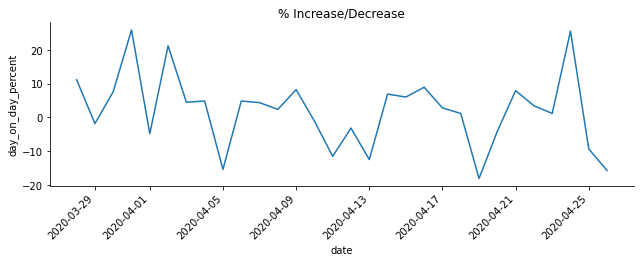

In [12]:
chart = sns.relplot(x="date", y="day_on_day_percent", kind="line", data=recent_df_subset.tail(30), height=3, aspect=3)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
chart.set(title='% Increase/Decrease')

# Singapore

In [13]:
country_subset = ['Singapore']
df_subset = df[df['country'].isin(country_subset)]
df_subset.drop(columns='state', inplace=True)
df_subset = df_subset.melt(id_vars=['country'], 
                           var_name="date", 
                           value_name="cumsum")
df_subset = add_stats(df_subset)

In [14]:
df_subset.tail()

,country,date,cumsum,case_count,day_on_day,day_on_day_percent
91,Singapore,2020-04-22,10141,1016.0,-95,-8.55
92,Singapore,2020-04-23,11178,1037.0,21,2.07
93,Singapore,2020-04-24,12075,897.0,-140,-13.50
94,Singapore,2020-04-25,12693,618.0,-279,-31.10
95,Singapore,2020-04-26,13624,931.0,313,50.65


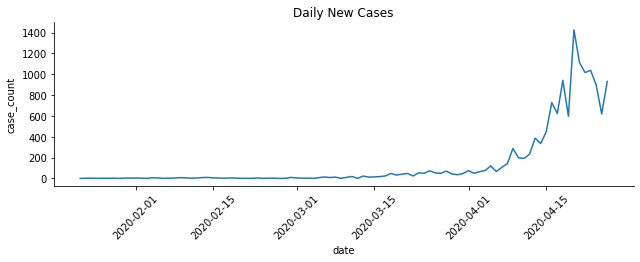

In [15]:
recent_df_subset = df_subset
# recent_df = df_world.tail(30)
chart = sns.relplot(x="date", y="case_count", kind="line", data=recent_df_subset, height=3, aspect=3)
chart.set_xticklabels(rotation=45)
chart.set(title='Daily New Cases')

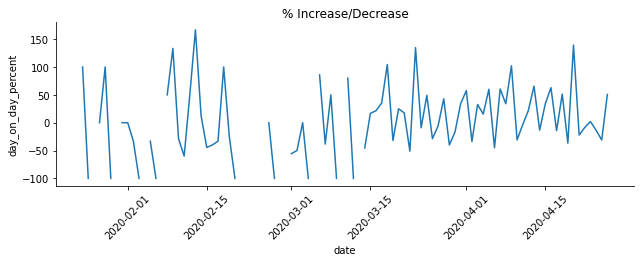

In [16]:
chart = sns.relplot(x="date", y="day_on_day_percent", kind="line", data=recent_df_subset, height=3, aspect=3)
chart.set_xticklabels(rotation=45)
chart.set(title='% Increase/Decrease')

# Others

In [17]:
country_subset = ['Malaysia']
df_subset = df[df['country'].isin(country_subset)]
df_subset.drop(columns='state', inplace=True)
df_subset = df_subset.melt(id_vars=['country'], 
                           var_name="date", 
                           value_name="cumsum")
df_subset = add_stats(df_subset)

In [18]:
df_subset.tail()

,country,date,cumsum,case_count,day_on_day,day_on_day_percent
91,Malaysia,2020-04-22,5532,50.0,-7,-12.28
92,Malaysia,2020-04-23,5603,71.0,21,42.00
93,Malaysia,2020-04-24,5691,88.0,17,23.94
94,Malaysia,2020-04-25,5742,51.0,-37,-42.05
95,Malaysia,2020-04-26,5780,38.0,-13,-25.49


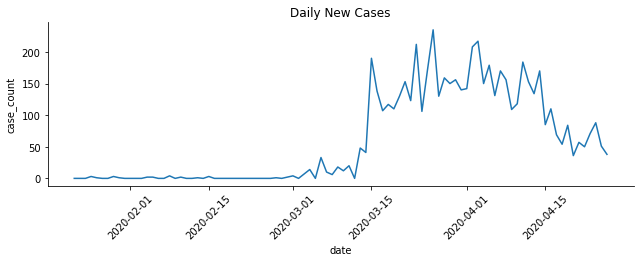

In [19]:
recent_df_subset = df_subset
# recent_df = df_world.tail(30)
chart = sns.relplot(x="date", y="case_count", kind="line", data=recent_df_subset, height=3, aspect=3)
chart.set_xticklabels(rotation=45)
chart.set(title='Daily New Cases')

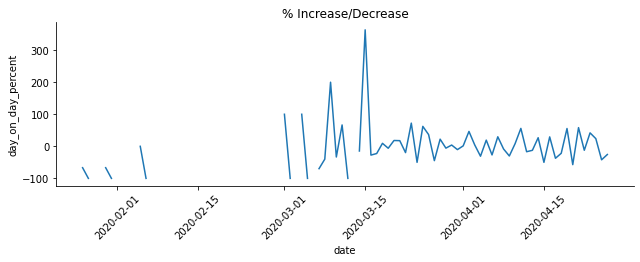

In [20]:
chart = sns.relplot(x="date", y="day_on_day_percent", kind="line", data=recent_df_subset, height=3, aspect=3)
chart.set_xticklabels(rotation=45)
chart.set(title='% Increase/Decrease')